# Task 1: Exploratory Data Analysis and Data Preprocessing

This notebook performs EDA and preprocessing on the CFPB complaint dataset. The steps include loading the data, analyzing complaint distributions, cleaning the narratives, and saving the processed data.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

### 2. Load Data

In [2]:
df = pd.read_csv('../data/raw/complaints.csv')

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_17832\4144223494.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


### 3. Analyze Complaint Distribution

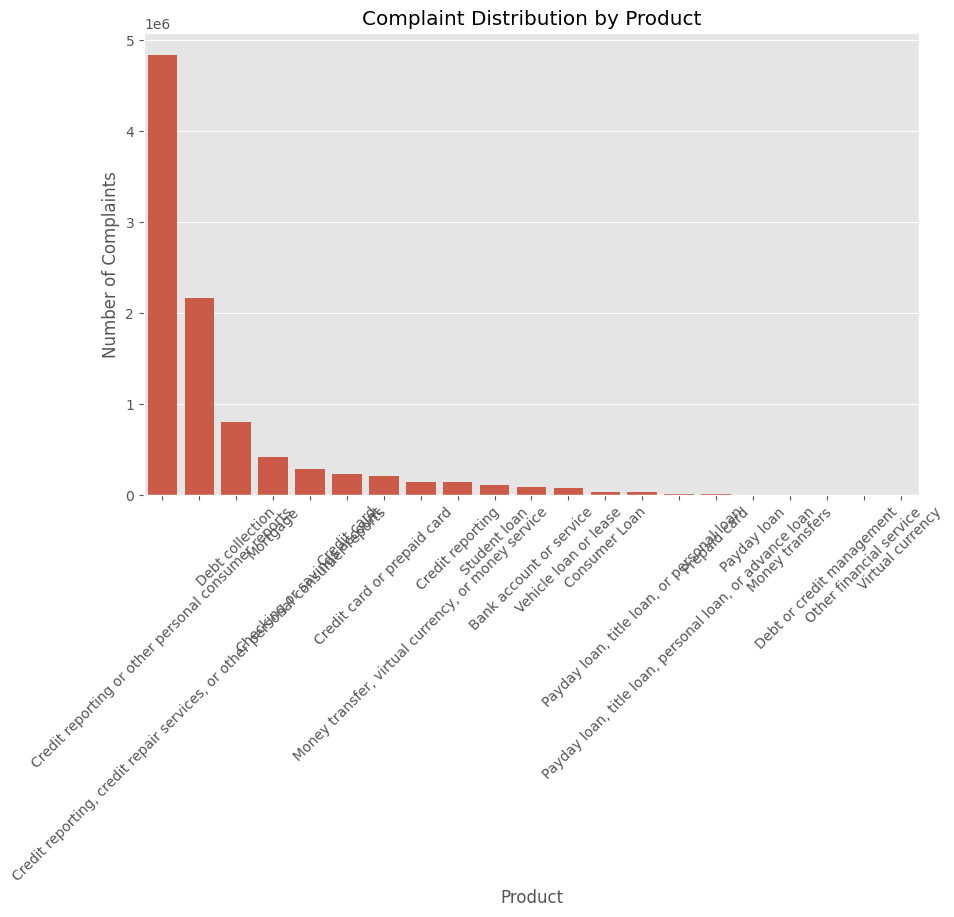

In [3]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Complaint Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

### 4. Analyze Complaint Narratives

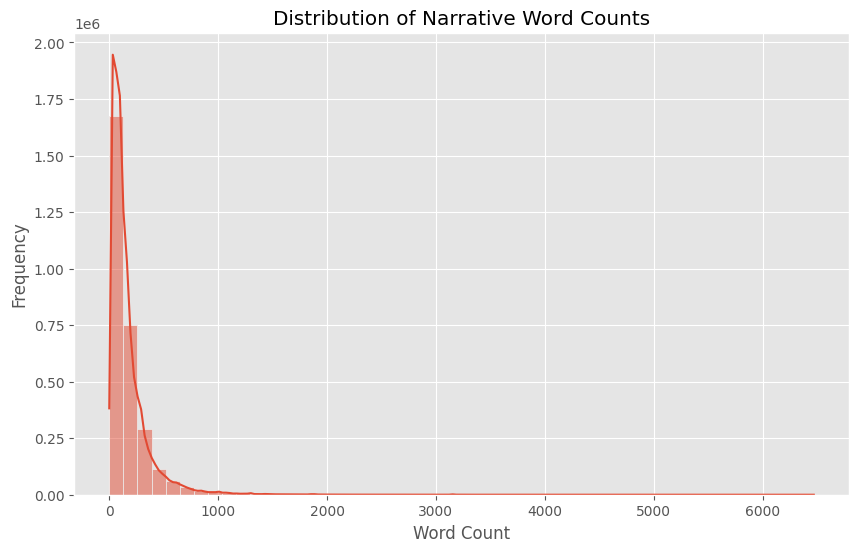

In [4]:
df['narrative_word_count'] = df['Consumer complaint narrative'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_word_count'].dropna(), bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [5]:
complaints_with_narratives = df['Consumer complaint narrative'].notna().sum()
complaints_without_narratives = df['Consumer complaint narrative'].isna().sum()
print(f'Complaints with narratives: {complaints_with_narratives}')
print(f'Complaints without narratives: {complaints_without_narratives}')

Complaints with narratives: 2980756
Complaints without narratives: 6629041


### 5. Filter and Clean Data

In [6]:
products_to_include = ['Credit card', 'Personal loan', 'Buy now, pay later', 'Savings account', 'Money transfer, virtual currency, or money service']
filtered_df = df[df['Product'].isin(products_to_include) & df['Consumer complaint narrative'].notna()]

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('i am writing to file a complaint', '')
    return text.strip()

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

C:\Users\Cyber Defense\AppData\Local\Temp\ipykernel_17832\3558324088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


### 6. Save Cleaned Data

In [8]:
filtered_df.to_csv('../data/processed/filtered_complaints.csv', index=False)

### 7. Conclusion

The notebook has successfully performed EDA and preprocessing. The cleaned and filtered dataset is saved to `data/processed/filtered_complaints.csv`.